In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interval = '1d'
btc_data = pd.read_csv(f'data/btc_{interval}_data_with_ma.csv', index_col=False)
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'])

In [3]:
btc_data.tail(15)

,timestamp,open,high,low,close,volume,MA_40,MA_50,MA_60,MA_70,...,MA_110,MA_120,MA_130,MA_140,MA_150,MA_160,MA_170,MA_180,MA_190,MA_200
2602,2024-10-01,63327.60,64130.63,60164.00,60805.78,43671.48108,60566.24075,60324.7868,60029.667167,60878.048429,...,61421.990182,62075.577167,62558.379231,62939.467429,62886.061933,62853.099188,62939.290353,63243.680833,63549.361737,63679.19330
2603,2024-10-02,60804.92,62390.31,60000.00,60649.28,31534.70118,60481.54175,60326.0294,60028.855333,60810.523857,...,61372.947364,61993.172500,62491.907769,62899.773000,62863.643800,62829.042563,62922.992059,63203.840056,63500.210579,63655.93655
2604,2024-10-03,60649.27,61477.19,59828.11,60752.71,26221.43472,60396.43425,60367.4158,60072.050500,60738.420429,...,61323.169727,61906.878417,62432.254231,62867.755143,62847.560600,62810.184438,62905.105706,63158.599556,63454.330158,63617.73270
2605,2024-10-04,60752.72,62484.85,60459.90,62086.00,21294.65994,60343.08425,60458.3146,60206.503667,60655.249143,...,61281.434545,61834.269583,62375.712462,62832.483714,62846.053400,62801.584563,62909.862353,63118.186278,63408.569105,63590.11275
2606,2024-10-05,62086.00,62370.56,61689.26,62058.00,7807.46141,60323.68425,60521.9826,60307.103500,60571.842000,...,61241.013364,61773.456250,62326.940231,62797.789429,62851.819867,62794.955687,62901.556000,63065.064056,63367.555737,63590.71575
2607,2024-10-06,62058.01,62975.00,61798.97,62819.91,8906.86177,60408.80700,60588.5410,60435.199333,60494.271000,...,61219.600545,61719.368333,62289.767077,62773.117286,62850.125867,62788.417625,62895.684824,63029.919111,63331.964842,63565.61275
2608,2024-10-07,62819.91,64478.19,62128.00,62224.00,25966.18520,60488.53450,60664.4740,60444.166167,60429.118286,...,61194.597182,61657.500500,62242.627308,62707.241429,62859.619267,62798.117625,62879.704882,62983.213111,63284.301632,63549.22640
2609,2024-10-08,62224.01,63200.00,61860.31,62160.49,19702.22371,60558.57150,60718.9138,60466.207833,60371.582429,...,61169.965364,61596.004583,62201.246385,62650.185357,62868.515933,62821.839625,62863.348059,62939.625667,63244.884211,63541.04565
2610,2024-10-09,62160.50,62543.75,60301.00,60636.02,20011.15684,60596.37225,60751.3582,60461.416333,60314.554143,...,61138.078636,61540.352750,62146.393846,62589.252500,62862.862800,62831.685937,62826.975706,62903.622889,63219.473842,63524.27570
2611,2024-10-10,60636.01,61321.68,58946.00,60326.39,23967.92481,60630.18225,60734.7654,60488.313000,60242.730857,...,61102.300273,61474.206083,62089.168923,62534.657786,62845.438200,62815.713312,62791.166235,62883.633333,63189.806000,63489.85770


# MACD

In [4]:
def make_macd(_df, short_term=12, long_term=26, signal=9):
    btc_data = _df.copy(deep=True)
    btc_data[f'EMA_{short_term}'] = btc_data['close'].ewm(span=short_term, adjust=False).mean()
    btc_data[f'EMA_{long_term}'] = btc_data['close'].ewm(span=long_term, adjust=False).mean()

    # Calculate MACD Line
    btc_data['MACD_Line'] = btc_data[f'EMA_{short_term}'] - btc_data[f'EMA_{long_term}']

    # Calculate Signal Line (9-period EMA of MACD Line)
    btc_data['Signal_Line'] = btc_data['MACD_Line'].ewm(span=signal, adjust=False).mean()

    # Calculate MACD Histogram
    btc_data['MACD_Histogram'] = btc_data['MACD_Line'] - btc_data['Signal_Line']

    btc_data = btc_data.drop(columns=[f'EMA_{short_term}', f'EMA_{long_term}'])
    return btc_data

In [5]:
# ma_candidates = [10, 20, 30, 50, 60, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
# ma_candidates = [230, 240, 250, 260, 270, 280, 290, 300]
# ma_candidates = [450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560]
# ma_candidates = [1000, 1010, 1020, 1030, 1040, 1050, 1060]
ma_candidates = [x for x in range(40, 210, 10)]

In [16]:
def backtest_and_calculate_profit(_df):
    df = _df.copy(deep=True)
    
    # Generate signals based on MACD Histogram crossing zero
    df['Signal'] = 0
    df['Signal'] = np.where(
        (df['MACD_Histogram'] > 0) & (df['MACD_Histogram'].shift(1) <= 0),
        1,  # Buy signal
        np.where(
            (df['MACD_Histogram'] < 0) & (df['MACD_Histogram'].shift(1) >= 0),
            -1,  # Sell signal
            0
        )
    )
    
    # Initialize variables
    initial_cash = 10000  # Starting with $10,000
    btc_holding = 0
    cash = initial_cash
    purchase_price = 0
    stop_loss = 0  # No stop loss (set to a value like 0.98 for a 2% stop loss)
    
    base_price = df['close'].iloc[0]
    final_price = df['close'].iloc[-1]
    base_portfolio_value = ((final_price - base_price) / base_price + 1) * initial_cash
    print(f"Base portfolio value: {base_portfolio_value:,.2f} USDT")
    
    for i in range(1, len(df)):
        price = df['close'].iloc[i]
        
        # Sell all
        if stop_loss > 0:
            # sell_price = price
            # cash = btc_holding * sell_price
            # btc_holding = 0
            # current_time = df['timestamp'].iloc[i]
            # print(f"{current_time}: [120 MA] Sold BTC at {sell_price:,.2f}, now holding {cash:,.2f} USDT\n")
            pass

        else:
            # Buy signal
            if df['Signal'].iloc[i] == 1:
                # if price < df['MA_120'].iloc[i]: # current price vs 120 MA
                    # continue
                if cash > 0:
                    purchase_price = price
                    btc_holding = cash / purchase_price
                    cash = 0
                    current_time = df['timestamp'].iloc[i]
                    print(f"{current_time}: Bought BTC at {purchase_price:,.2f}, holding {btc_holding:.4f} BTC")
            
            # Sell signal
            elif df['Signal'].iloc[i] == -1:
                if btc_holding > 0:
                    sell_price = price
                    cash = btc_holding * sell_price
                    btc_holding = 0
                    current_time = df['timestamp'].iloc[i]
                    print(f"{current_time}: Sold BTC at {sell_price:,.2f}, now holding {cash:,.2f} USDT\n")
        
        # Calculate current portfolio value (cash + value of BTC)
        portfolio_value = cash + (btc_holding * price)
        # Update the portfolio value for each iteration
        df.loc[df.index[i], 'portfolio_value'] = portfolio_value
    
    # Optionally, drop the 'Signal' column
    df = df.drop(columns=['Signal'])
    
    return df

## Filter 2018, 2022, bull, bear

In [7]:
# Filter btc_data for the year 2018 and 2022
def filter(_df):
    global btc_data_2018
    global btc_data_2024
    global bull_market_df
    global bear_market_df
    global bull_bear_market_df
    btc_data = _df.copy(deep=True)
    btc_data_2018 = btc_data[pd.to_datetime(btc_data['timestamp']).dt.year.isin([2018])]
    btc_data_2018 = btc_data_2018.drop(btc_data_2018[~pd.to_datetime(btc_data_2018['timestamp']).dt.year.isin([2018])].index)
    btc_data_2018 = btc_data_2018.reset_index(drop=True)

    btc_data_2022 = btc_data[pd.to_datetime(btc_data['timestamp']).dt.year.isin([2022])]
    btc_data_2022 = btc_data_2022.drop(btc_data_2022[~pd.to_datetime(btc_data_2022['timestamp']).dt.year.isin([2022])].index)
    btc_data_2022 = btc_data_2022.reset_index(drop=True)

    btc_data_2024 = btc_data[pd.to_datetime(btc_data['timestamp']).dt.year.isin([2024])]
    btc_data_2024 = btc_data_2024.drop(btc_data_2024[~pd.to_datetime(btc_data_2024['timestamp']).dt.year.isin([2024])].index)
    btc_data_2024 = btc_data_2024.reset_index(drop=True)

    btc_data_2021 = btc_data[pd.to_datetime(btc_data['timestamp']).dt.year.isin([2021])]
    btc_data_2021 = btc_data_2021.drop(btc_data_2021[~pd.to_datetime(btc_data_2021['timestamp']).dt.year.isin([2021])].index)
    btc_data_2021 = btc_data_2021.reset_index(drop=True)

    bull_market_df = btc_data[(btc_data['timestamp'] >= '2020-03-12') & (btc_data['timestamp'] <= '2021-04-16')]
    bull_bear_market_df = btc_data[(btc_data['timestamp'] >= '2020-10-10') & (btc_data['timestamp'] <= '2021-07-20')]
    bear_market_df = btc_data[(btc_data['timestamp'] >= '2021-11-10') & (btc_data['timestamp'] <= '2023-01-05')]


In [8]:
btc_data.head()

,timestamp,open,high,low,close,volume,MA_40,MA_50,MA_60,MA_70,...,MA_110,MA_120,MA_130,MA_140,MA_150,MA_160,MA_170,MA_180,MA_190,MA_200
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Test {ma, ma, signal} MACD

In [17]:
# ma = 120
# best settings: 70, 110, 13
short_term = 77
long_term = 101
signal = 13
btc_data_macd = make_macd(btc_data, short_term=short_term, long_term=long_term, signal=signal)
# filter(btc_data_macd)

profit_df = backtest_and_calculate_profit(btc_data_macd)
portfolio_value = profit_df['portfolio_value'].iloc[-1]
print(f"Final value interval {interval} for [{short_term}, {long_term}, {signal}] : {portfolio_value:,.2f} USDT")

Base portfolio value: 157,672.51 USDT
2017-08-29 00:00:00: Bought BTC at 4,587.48, holding 2.1798 BTC
2017-09-12 00:00:00: Sold BTC at 4,163.72, now holding 9,076.27 USDT

2017-10-02 00:00:00: Bought BTC at 4,380.00, holding 2.0722 BTC
2018-01-12 00:00:00: Sold BTC at 13,740.01, now holding 28,472.15 USDT

2018-04-22 00:00:00: Bought BTC at 8,787.02, holding 3.2403 BTC
2018-05-22 00:00:00: Sold BTC at 7,977.11, now holding 25,847.84 USDT

2018-07-16 00:00:00: Bought BTC at 6,723.35, holding 3.8445 BTC
2018-08-12 00:00:00: Sold BTC at 6,308.33, now holding 24,252.30 USDT

2018-08-26 00:00:00: Bought BTC at 6,700.00, holding 3.6197 BTC
2018-11-15 00:00:00: Sold BTC at 5,753.40, now holding 20,825.85 USDT

2019-01-03 00:00:00: Bought BTC at 3,766.78, holding 5.5288 BTC
2019-07-18 00:00:00: Sold BTC at 10,627.16, now holding 58,755.65 USDT

2019-11-04 00:00:00: Bought BTC at 9,393.35, holding 6.2550 BTC
2019-11-13 00:00:00: Sold BTC at 8,777.12, now holding 54,901.12 USDT

2020-01-05 00:00

In [35]:
btc_data_macd.head()

,timestamp,open,high,low,close,volume,MA_40,MA_50,MA_60,MA_70,...,MA_140,MA_150,MA_160,MA_170,MA_180,MA_190,MA_200,MACD_Line,Signal_Line,MACD_Histogram
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.066124,-0.152303,-0.913820
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.893298,-0.401017,-1.492281
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.006428,-0.773218,-2.233210
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.492312,-1.304518,-3.187794


## Find all ma candidates: Find Best MACD

In [36]:
# signal = 9
results = []

for short_term in range(60, 80, 1):
    for long_term in range(100, 120, 1):
        for signal in range(7, 20):
            btc_data_macd = make_macd(btc_data, short_term=short_term, long_term=long_term, signal=signal)
            # filter(btc_data_macd)
            profit_df = backtest_and_calculate_profit(btc_data_macd)
            # profit_df = backtest_and_calculate_profit(bull_bear_market_df)
            
            final_portfolio_value = profit_df['portfolio_value'].iloc[-1]

            results.append({
                    'short_term': short_term,
                    'long_term': long_term,
                    'signal': signal,
                    'final_portfolio_value': final_portfolio_value,
                })
            

Base portfolio value: 157,672.51 USDT
2017-08-27 00:00:00: Bought BTC at 4,310.01, holding 2.3202 BTC
2017-09-10 00:00:00: Sold BTC at 4,130.37, now holding 9,583.20 USDT

2017-09-30 00:00:00: Bought BTC at 4,378.51, holding 2.1887 BTC
2017-12-30 00:00:00: Sold BTC at 12,440.01, now holding 27,227.33 USDT

2018-01-05 00:00:00: Bought BTC at 16,960.39, holding 1.6053 BTC
2018-01-09 00:00:00: Sold BTC at 14,400.00, now holding 23,117.01 USDT

2018-03-04 00:00:00: Bought BTC at 11,515.00, holding 2.0076 BTC
2019-07-15 00:00:00: Sold BTC at 10,838.72, now holding 21,759.34 USDT

2019-08-07 00:00:00: Bought BTC at 11,975.03, holding 1.8171 BTC
2019-08-13 00:00:00: Sold BTC at 10,892.71, now holding 19,792.70 USDT

2019-10-28 00:00:00: Bought BTC at 9,205.14, holding 2.1502 BTC
2020-02-26 00:00:00: Sold BTC at 8,785.25, now holding 18,889.86 USDT

2020-04-07 00:00:00: Bought BTC at 7,197.32, holding 2.6246 BTC
2020-06-19 00:00:00: Sold BTC at 9,310.23, now holding 24,435.34 USDT

2020-07-25 

KeyboardInterrupt: 

In [12]:
results_df = pd.DataFrame(results)
best_results = results_df.sort_values(by='final_portfolio_value', ascending=False)

# Display the top 10 results
print("Top 10 MACD Combination by Final Portfolio Value:")
print(best_results.head(30))

Top 10 MACD Combination by Final Portfolio Value:
      short_term  long_term  signal  final_portfolio_value
4439          77        101      13          921136.976729
4192          76        102      13          903704.963563
3711          74        105      13          891235.020568
3464          73        106      13          887764.269271
4426          77        100      13          887764.269271
3945          75        103      13          887764.269271
3477          73        107      13          886823.454773
3958          75        104      13          883656.972260
4971          79        102      12          881836.975167
4984          79        103      12          878005.367457
4490          77        105      12          870808.591601
4737          78        104      12          867298.873277
3204          72        106      13          858640.260349
2970          71        108      13          858468.210338
2736          70        110      13          858468.210338
3685  

## Just holding BTC

In [13]:
# Function to calculate final value of holding BTC
def calculate_holding_value(df):
    initial_cash = 10000  # Start with $10,000 in cash

    # Buy BTC at the first available price
    initial_price = df['close'].iloc[0]
    btc_holding = initial_cash / initial_price  # Buy BTC with all available cash

    # Sell BTC at the last available price
    final_price = df['close'].iloc[-1]
    final_value = btc_holding * final_price  # Calculate the value of the BTC holding

    print(f"Initial BTC price: {initial_price:.2f} USDT")
    print(f"Final BTC price: {final_price:.2f} USDT")
    print(f"Final value of holding BTC: {final_value:,.2f} USDT")
    
    return final_value

In [14]:

# Example usage
# Assuming 'df' is a DataFrame with your historical price data (e.g., 1-hour BTC/USDT prices)
final_value = calculate_holding_value(btc_data)
just_holding_btc = final_value

Initial BTC price: 4285.08 USDT
Final BTC price: 67563.93 USDT
Final value of holding BTC: 157,672.51 USDT


In [15]:
import matplotlib.ticker as ticker

# Sort the dictionary by MA values
sorted_portfolio_value = dict(sorted(portfolio_value_by_ma.items()))

# Extract MA values and corresponding portfolio values
ma_values = list(sorted_portfolio_value.keys())
portfolio_values = list(sorted_portfolio_value.values())

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(ma_values, portfolio_values, marker='o')

# Customize the plot
plt.title(f'Portfolio Value by Moving Average Period: {interval}, {best_ma}MA', fontsize=16)
plt.xlabel('MA', fontsize=12)
plt.ylabel('Final Portfolio Value (USDT)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format ticks with commas


# Add value labels on top of each point
for i, value in enumerate(portfolio_values):
    plt.text(ma_values[i], value, f'{value:,.0f}', ha='center', va='bottom')

# Add x-axis labels for each MA value
plt.xticks(ma_values, [f'{ma}' for ma in ma_values], rotation=0, ha='right')

# Adjust the bottom margin to accommodate the labels
plt.subplots_adjust(bottom=0.2)

# Add a horizontal line at just_holding_btc
plt.axhline(y=just_holding_btc, color='red', linestyle='--', label='Just Hold BTC Value')
plt.legend()

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'portfolio_value_by_ma' is not defined

## Portfolio cumulative profit

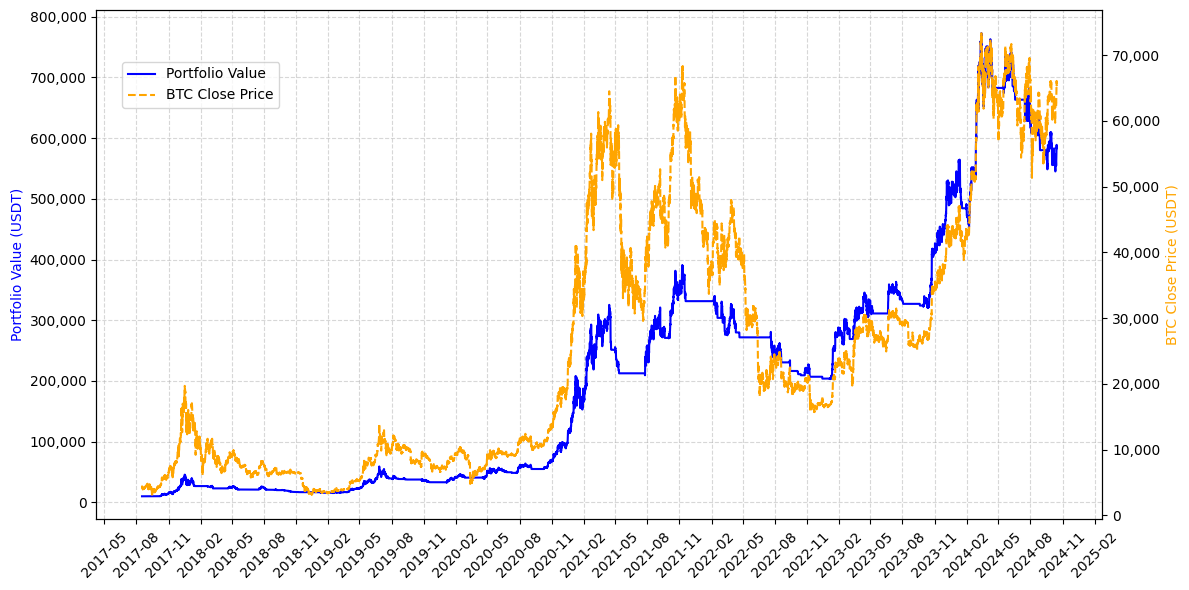

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

# Create a new figure with a specific size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the portfolio value over time on the left y-axis
ax1.plot(btc_data['timestamp'], btc_data['portfolio_value'], label='Portfolio Value', color='blue')

# Set x-axis ticks to show every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Tick every 3 months

# Format the x-axis to show Year-Month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-ticks for readability
plt.xticks(rotation=45)

# Set the y-axis label for portfolio value
ax1.set_ylabel('Portfolio Value (USDT)', color='blue')

# Format y-axis tick labels with commas on the left axis
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format ticks with commas

# Enable grid for left axis
ax1.grid(True, linestyle='--', alpha=0.5)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the BTC close price on the right y-axis
ax2.plot(btc_data['timestamp'], btc_data['close'], label='BTC Close Price', color='orange', linestyle='--')

# Set the y-axis label for BTC close price
ax2.set_ylabel('BTC Close Price (USDT)', color='orange')

# Optionally, format the y-axis on the right if needed (e.g., formatting for currency)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format ticks with commas

# Add a legend for both plots
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Adjust layout to prevent cutting off labels
fig.tight_layout()

# Show the plot
plt.show()

In [31]:
# Filter btc_data for the year 2018 and 2022
btc_data_2018 = btc_data[pd.to_datetime(btc_data['timestamp']).dt.year.isin([2017, 2018])]
btc_data_2018 = btc_data_2018.drop(btc_data_2018[~pd.to_datetime(btc_data_2018['timestamp']).dt.year.isin([2017, 2018])].index)
btc_data_2018 = btc_data_2018.reset_index(drop=True)

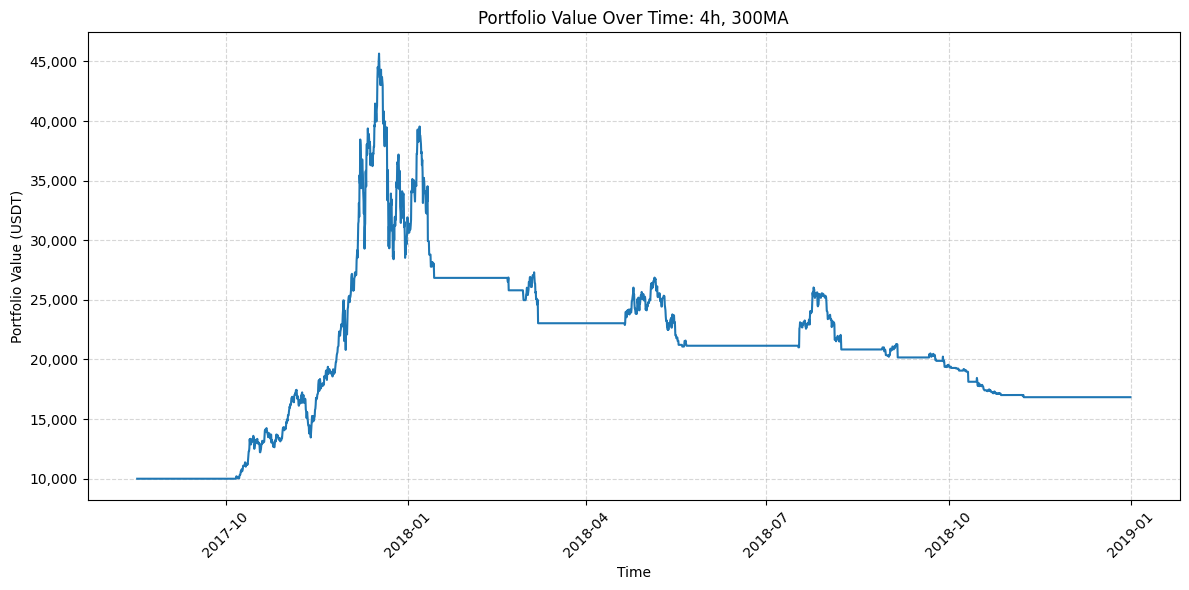

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Plot the portfolio value over time
plt.plot(btc_data_2018['timestamp'], btc_data_2018['portfolio_value'], label='Portfolio Value')
plt.gca().autoscale()

# Set x-axis limits to show only 2017
# start_date = datetime(2017, 1, 1)
# end_date = datetime(2017, 12, 31)
# plt.xlim(start_date, end_date)

# Set x-axis ticks to show every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Tick every 3 months

# Format the x-axis to show Year-Month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-ticks for readability
plt.xticks(rotation=45)

# Set y-axis limits
# plt.ylim(-100000, 1300000)

# Set y-axis ticks to every 100,000 units
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000))  # Tick every 100k

# Format y-axis tick labels with commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format ticks with commas
# Set labels and title
plt.xlabel('Time')
plt.ylabel('Portfolio Value (USDT)')
plt.title(f'Portfolio Value Over Time: {interval}, {ma}MA')

# Enable grid with a dashed line style
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()